<a href="https://githubtocolab.com/BorjaRequena/Neural-Network-Course/blob/master/nbs/course/montecarlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
#| hide
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from numpy.random import rand

# Random variables and probability distributions 

Random variables can take different values randomly. Variables themselves only describe the states that are possible and, thus, they must be coupled with a probability distribution that determines how likely these are [@goodfellow:2016].

For continuous random variables, we describe their probability distributions with a probability density function (PDF).
Let us denote a random variable by $x$, and suppose we can sample from its probability distribution with PDF $p(x)$. The probability of a sample to be between the interval $x$ and $x+d(x)$ is $p(x)dx$.
The PDF is normalized: 
$$\int p(x)dx=1$$

For discrete random variables, we use probability mass functions (PMF) that assign a probability to every random state $x^i$ the variable can take $P(x^i)$. 
Therefore, in this case, the normalization is a discrete sum: 
$$\sum_i P(x^i)dx=1$$

There are two fundamental quantities about probability distributions.
The mean $\mu$ is the resulting mean value in the limit of drawing infinite samples:
$$\mu= \int x p(x)dx$$
The variance $\sigma$ can give us information about how spread the PDF is:
$$\sigma= \int (x-\mu)^2 p(x)dx$$
For discrete variables, we replace the integrals by summations.

## Gaussian Probability Distribution
The Gaussian (normal) distribution is defined as:
$$p(x)=\frac{1}{\sigma\sqrt{2\pi}}exp-\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,.$$
Here, the variance and the mean of the distribution appear explicitly in the pdf formula.

This distribution is very important in many applications mainly due to two reasons. First, the central limit theorem (informally) states that the probability distribution of the sum of many independent random variables trends towards a normal distribution, even if the original variables themselves are not normally distributed. Meaning that we can model many complicated systems with normal distributions.

Second, the gaussian distribution encodes the maximum possible amount of uncertainty for a fixed variance. Thus, it is the probability distribution assumes the least amount of knowledge about the systems we wish to model.

# Using probability distributions to compute areas

Probability theory tells us that we may approximate an integral over a function in an interval:
$$\int_a^b f(x)dx$$
by averaging the function values $f(x_n)$ at values $x_n$ randomly chosen according to the uniform distribution $p(x) = 1/(b − a)$:
$$\frac{1}{(b − a)}\int_a^b f(x)dx=\lim_{N\to \infty} \frac 1 N \sum_n^N f(x_n)$$

The method replaces the exact mean by a _sample mean_. This is akin to opinion polls, where we are limited to a finite number of samples $N$, just like in actual calculations. One can prove that the uncertainty in that estimate of the correct mean behaves like $\sim\sqrt \frac 1 N$.
Actually, even this is just a probabilistic statement, since the error itself has a statistical error and so on. However dubious this may seem at first sight, the method works amazingly well in practice. Furthermore, Monte Carlo sampling is easily applicable to higher dimensional integrals.

## Example

As an example, let's compute the integral of the parabola $f(x)=-x^2 +10$ in the interval $x\in [-3, 3]$

In [ ]:
def parabola(x):
    return -(x)**2 + 10

def is_below_parabola(point):
    if parabola(point[0]) > point[1]:
        return 1
    else:
        return 0

def sample_random_point(interval_x, interval_y):
    x = np.random.rand()*(interval_x[1]-interval_x[0])+interval_x[0]
    y = np.random.rand()*(interval_y[1]-interval_y[0])+interval_y[0]
    return [x, y]

In [ ]:
area = 0
repetition = 10000
random_points = []
interval_x = [-3, 3]
interval_y = [1, 10]
for _ in range(repetition):
    # Sample random point
    random_point = sample_random_point(interval_x, interval_y)
    random_points.append(random_point)
    
    # Is it below the parabola?
    area += is_below_parabola(random_point)
        
area = area/repetition

<matplotlib.collections.PathCollection>

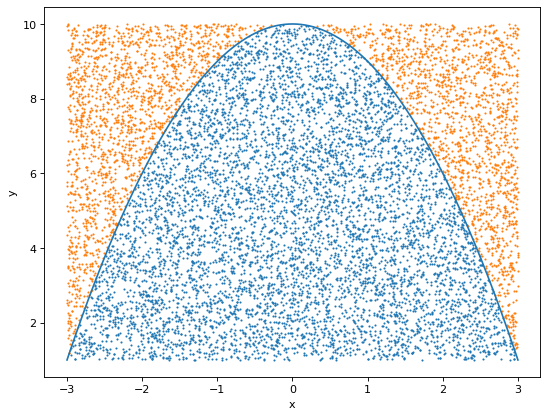

In [ ]:
#| code-fold: true
x_below, x_above = [], []
y_below, y_above = [], []

for random_point in random_points:
    if is_below_parabola(random_point):
        x_below.append(random_point[0])
        y_below.append(random_point[1])
    else:
        x_above.append(random_point[0])
        y_above.append(random_point[1])

xvals = np.linspace(-3, 3, 10000)  # meshgrid to draw the line
yvals = parabola(xvals)            # evaluate f for each point

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(xvals, yvals)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_below, y_below, s=0.8)
plt.scatter(x_above, y_above, s=0.8)

The ration between the points below and above the curve 0.663. The analitical value is 2/3, meaning that we have a great approximation to the integral!

In [ ]:
area

0.6629

As we mentioned above, the error goes as $\sim \sqrt{1/N}$. Thus, if we want to reduce it by an order of magnitude, we need to take 100 times more samples.

# Ising model

Now let's see how we can apply this technique to study physical systems.
The Ising model is a simple, classical lattice model of a ferromagnet. In its simplest form, it is defined in terms of classical spins $\sigma$ taking on the values $\pm1$ on a $d-dimensional$ lattice. The so-called reduced or dimensionless Hamiltonian of the Ising model can be written as:
$$H=-J \sum_{<i,j>} \sigma_i \sigma_j-h\sum_{i} \sigma_i $$
where $\sigma_i$ is the value of the spin at site $i$, $J$ and $h$ are dimensionless parameters, and $<i,j>$ denotes the nearest neighbours lattice sites.
The parameter h represents the effect of an external magnetic field coupled to all spins, while the parameter $J$ represents the coupling of each spin to its nearest neighbors. The partition function is given by:
$$Z=\sum_{\sigma } e^{-H(\sigma)/T} $$
and the statistical average of any observable $X$ is given by
$$\left\langle X \right\rangle=\frac 1 Z \sum_{\sigma } X e^{-H(\sigma)/T} $$

If $J>0$, the coupling is ferromagnetic and in the limit $T\to 0$ all spins are aligned. It is also common to work with the inverse temperature $\beta = 1/T$, such that the limit becomes $\beta \to \infty$. 

When $h = 0$, the model is invariant under the global symmetry $x\to - x$.
If this symmetry is unbroken, then we must have $\left\langle X \right\rangle = 0$, while $\left\langle X \right\rangle\neq 0$ implies spontaneous symmetry breaking. For dimension $d>2$, the Ising model
has a low-temperature (large $J$) phase with spontanously broken symmetry. The critical point where this behavior sets in is given by the critical inverse temperate $\beta_c$. For the 2-dimensional Ising model on a square lattice with $J=1$ and $h=0$, we have:
$$\beta_c= \frac{1+\sqrt2}{2}\sim 0.441 $$

To compute observables of this model (or any statistical machanical model) we need to compute (in this case approximate) the sum over all the possible configurations weighted by the factor $e^{-H(\sigma)/T}$, that is known as the Bolzmann weight. 

::: {.callout-note}
It is known that there cannot be a phase transition in one dimension.
:::

# Importance sampling 
Monte Carlo simulations work by creating a stream of lattice configurations that together approximate an ensemble with Boltzmann weight.
The probability of a given configuration a is proportional to its Boltzmann weight $\propto e^{-E_\sigma/T}$, where $E_\sigma=H(\sigma)$. Depending on the Hamiltonian $H$, it will give different importance to different configurations.

Therefore, when summing over the configurations, it is more important to consider those with larger weights, as they will dominate over those with smaller ones. The central idea of the so-called importance sampling Monte Carlo method is to approximate the huge sum over all possible configurations by a comparatively small subset sampled according to their weight factor.

In general, let $p(x)$ be a probability distribution from which we want to sample. If $p(x)$ is higly peaked, it will contain large regions with nearly-zero probability that will have a negligible contribution to any calculation we perform. What we want to do is to sample from the points close to where $p(x)$ has its peaks. Let $g(x)$ be another probability distribution. We can always write: 

$$\int p(x) dx=\int g(x) \frac{p(x)}{g(x)} dx \sim \sum_{x_i\sim g(x)}  \frac{p(x_i)}{g(x_i)} $$
Using the Cauchy-Schwarz inequality, it can be shown that the variance of the monte carlo estimator is minimized when $g(x)=|p(x)|$. In general, we cannot sample directly from $p(x)$, but a good sampling function $g(x)$ should have the following properties: 
1. $g(x) > 0$ whenever $p(x)>0$
2. $g(x)$ should be close to being proportional to $p(x)$
3. it should be easy to sample values from $g(x)$
4. it should be easy to compute the density $g(x)$ for any value $x$ that you might realize.

In physics, we are interested in computing Expectation value of observables. In general, we can write the expecation value:
$$\left\langle X \right\rangle=\frac 1 Z \sum_{\sigma } X(\sigma) e^{-H(\sigma)/T} \approx \sum_{x_i\sim p(x)}  X(x_i) $$
where $p(x)=\frac 1 Z e^{-H(x_i)/T}$.


How do we find configurations $x_i$ following the probability distribution $p(x)$? 
The problem is that we cannot compute directly the normalization fuctor $Z$ in $p(x)$. This direct computation would have a unfeasible computational cost. This makes sampling from $p(x)$ directly impossible for practical cases. 

The idea is to start from some arbitrary configuration and then build a stochastic sequence of configurations that eventually follows an equilibrium distribution $p(x)$. This is done with a so-called homogeneous Markov chain or Markov process:
$$ x_0 \to x_1 \to x_3 \to x_3 \to \dots $$
In this Markov chain configurations $x_n$ are generated subsequently. The index $n$ labels the configurations in the order they appear in the chain; it is often referred to as computer time, not to be mistaken with the Euclidean time of the physical system. The change of a field configuration to a new one is called an update or a Monte Carlo step.

# Markov chain Monte Carlo
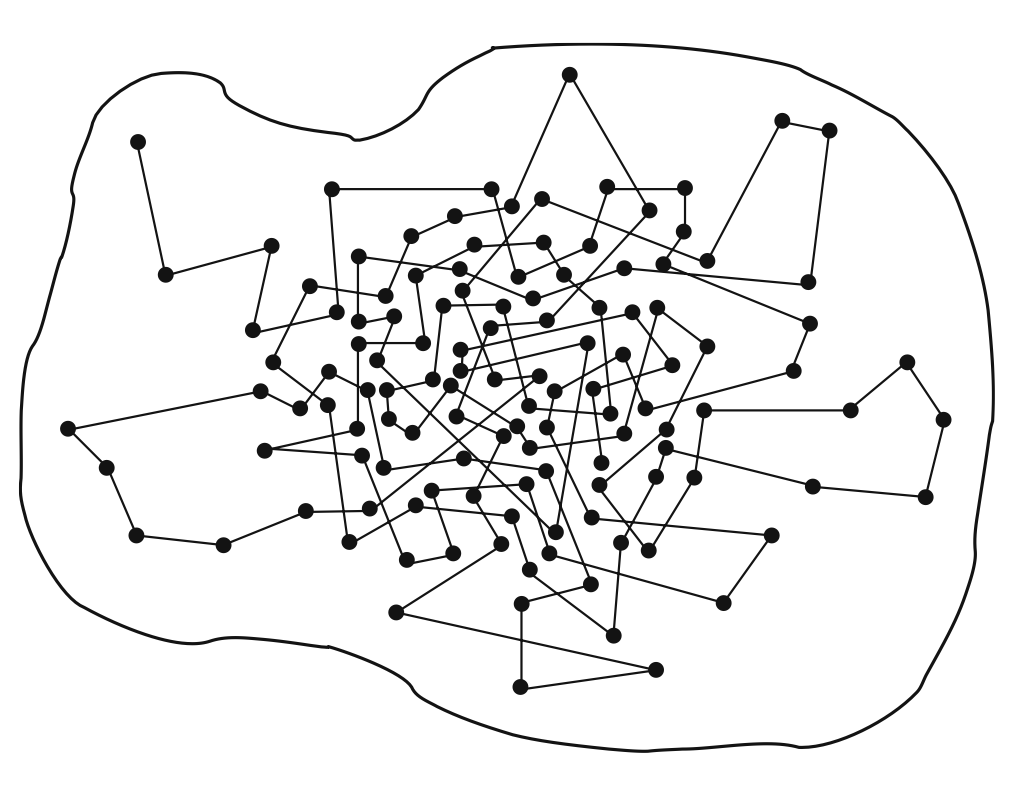

In this figure we show a schematic sketch of a Markov chain. The boundary delimits the space of all configurations. The dots represent configurations visited by our Markov chain and we connect them with straight lines to indicate that they are visited subsequently. The Markov chain in the figure starts in the upper left corner and then quickly moves toward the center of the blob, where we find a large density of dots. This corresponds to a region of configurations with large Boltzmann factor $exp(−H)$ and thus with high probability. The Markov process is constructed such that it visits configurations with larger probabilities more often. A Markov process is characterized by a conditional transition probability (read: probability to get $x'$ if starting from x):

$$ p(x_n = x'| x_{n-1}=x)=T(x'|x)$$

This probability depends only on the configurations $x$ and $x'$ but not on theindex $n$. The transition probabilities $T(x′|x)$ obey:
$$ 0 \leq T(x'|x) \leq 1, \;\;\; \sum_{x'} T(x'|x) = 1$$

The inequality simply delimits the range of a probability. The sum states that the total probability to jump from some configuration $x$ to any target configuration $x'$ is equal to 1 (note that this includes also the case $x'=x$ ).

Let us now discuss an important condition for $T(x'|x)$. Once it is in equilibrium, our Markov process cannot have sinks or sources of probability. Thus the probability to hop into a configuration $x'$ at the step $x_{n-1}\to x_n$ has to be equal to the probability for hopping out of $x_{n}\to x_{n-1}$ at this step. The corresponding balance equation reads as:
$$ \sum_x T(x' |x ) P(x) \stackrel{!}{=} \sum_{x}T(x|x')P(x' )$$
This is known as the **detailed balance equation**. 
On the left-hand side we sum the transition probability $T(x'|x)$ leading into the final configuration $x$ over all starting configurations $x$, weighted by the probability $p(x)$ that the system actually is in the configuration $x$. This expression gives the total probability to end up in $x'$ and has to equal the probability to hop out of $x'$, which we compute on the right-hand side. It is given by the probability $p(x')$ of finding the system in the configuration $x'$ times the sum of the transition probability $T(x'|x)$ over all final configurations $x$ the system could jump into. Note that on both sides we also included the case where $x=x'$, i.e., the case without actual transition.

Before we discuss a solution of the balance equation, let us note an important property. The sum on the right-hand side can be calculated explicitly by using the normalization property. We find:
$$ \sum_x T(x' |x ) P(x) = P(x')$$
showing that the equilibrium distribution $p(x)$ is a fixed point of the Markov process.
Once the equilibrium distribution is obtained, the system stays there upon applying $T$. Starting the process from an arbitrary initial configuration $x_0$ with initial distribution $p^{(0)}(x) = \delta(x − x_0)$, one eventually obtains the equilibrium distribution $p(x)$ by applying the transition matrix iteratively:
$$ p^{(0)} \stackrel{T}{\to} p^{(1)} \stackrel{T}{\to} p^{(3)} \stackrel{T}{\to} p^{(4)} \stackrel{T}{\to}  \dots \to P $$

Let us address an important point. For obtaining correct results, the Markov chain must be able to access all configurations. In other words, it must be possible to reach all points inside the blob of the previous figure in a finite number of steps. If the transition matrix $T(x' |x )$ is strictly positive for all pairs $x',x$, then the process is aperiodic and every configuration can be eventually reached. This property is called **strong ergodicity**. In realistic simulations ergodicity and the related problem of relaxation are important questions. In particular, if there are topologically different sectors in the configuration space, some Monte Carlo algorithms may have problems connecting them.

In practical simulations, we start with the equilibration (termalization) process, applying $T$ a number of times to an initial configuration. After termalizing, we can start computing the observables of interest. The subtle question is when one can assume that the distribution of the considered configurations is already close enough to the equilibrium distribution. This decision is usually based on the measurement of certain observables and correlations.

We now present a sufficient condition for a solution of the balance equation. On both sides we have sums over all configurations $x$, and these sums have to be equal. A solution can be obtained, by requiring that the equality holds term-wise:
$$  T(x' |x ) P(x) = T(x|x')P(x' )$$
This sufficient condition is known as the **detailed balance condition**. Although other solutions are known, most algorithms use the detailed balance condition. Now we will discuss the “mother of all Monte Carlo algorithms” based on the detailed balance condition: the Metropolis-Hasting algorithm.

## Metropolis-Hasting algorithm


The Metropolis-Hastings algorithm advances the Markov chain from a configuration $x_{n-1}$ to some new configuration $x_n$ repeatedly applying the following steps:

1. Choose some candidate configuration $x'$ according to some a priori selection probability $T_0(x′|x)$, where $x = x_{n−1}$. 
2. Accept the candidate configuration $x'$ as the new configuration $x_n$ with acceptance probability:
$T_A(x' |x ) =min\left(1,\frac{T_0(x|x')e^{−H(x')}}{T_0(x′|x)e^{−H(x)}}\right)$. Otherwise, set $x_n = x_{n-1}$.

This way, if a suggested change is not accepted, the unchanged configuration is considered again in the Markov chain and included in the measurements like the others.

It is straightforward to see that the total transition probability $T = T_0 T_A$ fulfills the detailed balance condition by construction:
$$  T(x' |x ) P(x) = T_0(x|x')\, min\left(1,\frac{T_0(x|x')p(x')}{T_0(x′|x)p(x)}\right)p(x) =  min\left(T_0(x|x')p(x),T_0(x|x')p(x')\right) =  T(x |x' ) P(x')$$
In many cases one uses a symmetric selection probability which obeys:
$$  T_0(x' |x )= T_0(x |x' ) $$
In particular for symmetric T0, the information necessary to decide on acceptance or rejection comes only from the change of the Hamiltonia $\Delta H$ with respect to the change of the configuration. If this change is local, e.g., it just involves a single spin variable, then $\Delta H$ may be determined from the spin values in the local neighborhood.

::: {.callout-note}
The central step of the Monte Carlo procedure needs random numbers. In the computer programs these are so-called pseudo random numbers, generated reproducibly by algorithms. The statistical properties of the pseudo random numbers are very close to those of real random numbers. Typical Monte Carlo runs may need $O(10^{12})$ random numbers. Therefore, utmost care has to be taken in selecting a proper generator. Standard implementations of random number generators are often not reliable enough and produce subtly correlated numbers with too small periods. High-quality generators use the so-called lagged Fibonacci method and there are generators with extremely long guaranteed periods $O(10^{171})$. Pseudo random numbers are usually generated according to a uniform distribution in the interval $[0, 1)$. There exists a variety of algorithms to generate from these other distributions. There are nowadays quantum random number generators (e.g the one produced by Quside, a spinoff from ICFO) for particularly expensive Monte Marlo simulations.
:::

## Monte Carlo of a two dimensional Ising model

In [ ]:
def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  config[a, b]
            nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
            cost = 2*s*nb

            if cost < 0:
                s *= -1
            elif rand() < np.exp(-cost*beta):
                s *= -1
            config[a, b] = s
    return config

def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting

def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag

In [ ]:
## NOTE: change these parameters for a smaller and faster simulation 
#----------------------------------------------------------------------

nt      = 16         #  number of temperature points
N       = 20         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) # divide by number of samples, and by system size to get intensive values


In [ ]:
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

for tt in range(nt):
    config = initialstate(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1 #Energy
    M[tt] = n1*M1 #Magnetization 
    C[tt] = (n1*E2 - n2*E1*E1)*iT2 #Specific Heat 
    X[tt] = (n1*M2 - n2*M1*M1)*iT  #Susceptibility

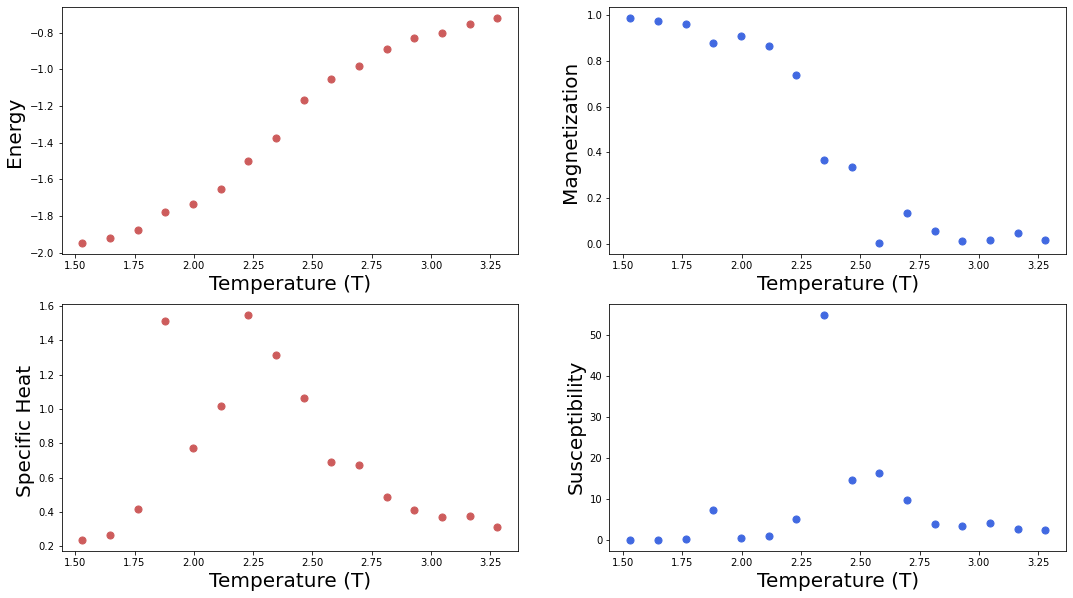

In [ ]:
#| code-fold: true
f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

Example montecarlo in:
http://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana